In [44]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from scipy.stats import t as tdist 
import scipy.stats as stats
from statsmodels.stats.outliers_influence import summary_table
get_ipython().magic(u'matplotlib inline')
from statsmodels.sandbox.regression.predstd import wls_prediction_std as pi

In [45]:
os.getcwd()

'/Users/sahiljain/Downloads'

In [46]:
os.chdir("/Users/sahiljain/Downloads/")

In [47]:
bostonData = pd.read_csv('boston.csv')

In [48]:
# First we will assign these variables a identifier 
# for eg. y = medv (response variable), x1,x2...xn as our 
# explanatory variable. 

In [49]:
y = bostonData["medv"]
x1 = bostonData["crim"]
x2 = bostonData["zn"]
x3 = bostonData["indus"]
x4 = bostonData["chas"]
x5 = bostonData["nox"]
x6 = bostonData["rm"]
x7 = bostonData["age"]
x8 = bostonData["dis"]
x9 = bostonData["rad"]
x10 = bostonData["tax"]
x11 = bostonData["ptratio"]
x12 = bostonData["lstat"]

In [50]:
#(A) Fit a multiple lineaer regression relating medv to all 
# of explanatory variables listed above and calculate and 
# interpret that value of R^2. 

In [51]:
lm = smf.ols('y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12', data = bostonData)
model1 = lm.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          2.23e-133
Time:                        22:29:38   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.000      31.919      51.316
x1            -0.1214      0.033     -3.678      0.000      -0.186      -0.057
x2             0.0470      0.014      3.384      0.001       0.020       0.074
x3             0.0135      0.062      0.217      0.829      -0.109       0.136
x4             2.8400      0.870      3.264      0.001       1.131       4.549
x5           -18.7580      3.851     -4.870      0.000     -26.325     -11.191
x6             3.6581      0.420      8.705      0.000       2.832       4.484
x7             0.0036      0.013      0.271      0.787      -0.023       0.030
x8            -1.4908      0.202     -7.394      0.000      -1.887      -1.095
x9             0.2894      0.067      4.325      0.000       0.158       0.421
x10           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
x11           -0.9375      0.132     -7.091      0.000      -1.197      -0.678
x12           -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
table = sm.stats.anova_lm(model1, type = 2)
print(table)
model1.summary()

             df        sum_sq       mean_sq           F        PR(>F)
x1          1.0   6440.783059   6440.783059  279.776974  4.526858e-50
x2          1.0   3554.336197   3554.336197  154.394491  4.982120e-31
x3          1.0   2551.236435   2551.236435  110.821495  1.630882e-23
x4          1.0   1529.847881   1529.847881   66.454064  2.981730e-15
x5          1.0     76.247648     76.247648    3.312072  6.937901e-02
x6          1.0  10938.116611  10938.116611  475.133712  2.901710e-74
x7          1.0     90.267911     90.267911    3.921089  4.823953e-02
x8          1.0   1779.501111   1779.501111   77.298588  2.462547e-17
x9          1.0     34.134323     34.134323    1.482739  2.239290e-01
x10         1.0    329.554069    329.554069   14.315284  1.736099e-04
x11         1.0   1309.309339   1309.309339   56.874234  2.251728e-13
x12         1.0   2733.542023   2733.542023  118.740549  6.392118e-25
Residual  493.0  11349.418808     23.021133         NaN           NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          2.23e-133
Time:                        22:29:38   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.000      31.919      51.316
x1            -0.1214      0.033     -3.678      0.000      -0.186      -0.057
x2             0.0470      0.014      3.384      0.001       0.020       0.074
x3             0.0135      0.062      0.217      0.829      -0.109       0.136
x4             2.8400      0.870      3.264      0.001       1.131       4.549
x5           -18.7580      3.851     -4.870      0.000     -26.325     -11.191
x6             3.6581      0.420      8.705      0.000       2.832       4.484
x7             0.0036      0.013      0.271      0.787      -0.023       0.030
x8            -1.4908      0.202     -7.394      0.000      -1.887      -1.095
x9             0.2894      0.067      4.325      0.000       0.158       0.421
x10           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
x11           -0.9375      0.132     -7.091      0.000      -1.197      -0.678
x12           -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Interpretation :  R squared in calculated by dividing 
# Residual sum of squares/ total sum of squares. In this 
# model the SSR = 31366.7, value of SSE = 11349.5, value of 
# SST = 42716.1. R^2 = SSR/SST = 31366.7/42716.2 = .7343, 
# meaning that the fitted model explains 73.43% of the 
# variability in the response variable. We can see the same 
# values in annova output as well as in the MLR output. 

In [54]:
# (B) Fit a multiple linear regression model relating medv 
# to all of the explanatory variables listed above - except 
# indus - and calculate and interpret that value of R^2. 

In [55]:
lm = smf.ols('y ~ x1 + x2 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12', data = bostonData)
model2 = lm.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          2.00e-134
Time:                        22:29:38   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5437      4.920      8.445      0.000      31.878      51.210
x1            -0.1216      0.033     -3.691      0.000      -0.186      -0.057
x2             0.0466      0.014      3.383      0.001       0.020       0.074
x4             2.8591      0.865      3.307      0.001       1.160       4.558
x5           -18.5349      3.708     -4.999      0.000     -25.819     -11.250
x6             3.6500      0.418      8.728      0.000       2.828       4.472
x7             0.0036      0.013      0.271      0.787      -0.023       0.030
x8            -1.5000      0.197     -7.617      0.000      -1.887      -1.113
x9             0.2854      0.064      4.443      0.000       0.159       0.412
x10           -0.0123      0.003     -3.611      0.000      -0.019      -0.006
x11           -0.9338      0.131     -7.130      0.000      -1.191      -0.676
x12           -0.5511      0.050    -10.927      0.000      -0.650      -0.452
==============================================================================
Omnibus:                      171.179   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.910
Skew:                           1.477   Prob(JB):                    4.24e-155
Kurtosis:                       7.999   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
table = sm.stats.anova_lm(model2, type = 2)
print(table)
model2.summary()

             df        sum_sq       mean_sq           F        PR(>F)
x1          1.0   6440.783059   6440.783059  280.317768  3.643084e-50
x2          1.0   3554.336197   3554.336197  154.692928  4.367888e-31
x4          1.0   1233.791018   1233.791018   53.697437  9.603693e-13
x5          1.0   1592.392109   1592.392109   69.304586  8.332584e-16
x6          1.0  12090.956846  12090.956846  526.226393  7.948918e-80
x7          1.0    122.792725    122.792725    5.344223  2.120153e-02
x8          1.0   1509.628920   1509.628920   65.702541  4.157204e-15
x9          1.0    109.890984    109.890984    4.782710  2.921508e-02
x10         1.0    602.891821    602.891821   26.239246  4.332236e-07
x11         1.0   1365.119628   1365.119628   59.413162  7.075793e-14
x12         1.0   2743.212102   2743.212102  119.390932  4.854223e-25
Residual  494.0  11350.500006     22.976721         NaN           NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     124.1
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          2.00e-134
Time:                        22:29:38   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     494   BIC:                             3085.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5437      4.920      8.445      0.000      31.878      51.210
x1            -0.1216      0.033     -3.691      0.000      -0.186      -0.057
x2             0.0466      0.014      3.383      0.001       0.020       0.074
x4             2.8591      0.865      3.307      0.001       1.160       4.558
x5           -18.5349      3.708     -4.999      0.000     -25.819     -11.250
x6             3.6500      0.418      8.728      0.000       2.828       4.472
x7             0.0036      0.013      0.271      0.787      -0.023       0.030
x8            -1.5000      0.197     -7.617      0.000      -1.887      -1.113
x9             0.2854      0.064      4.443      0.000       0.159       0.412
x10           -0.0123      0.003     -3.611      0.000      -0.019      -0.006
x11           -0.9338      0.131     -7.130      0.000      -1.191      -0.676
x12           -0.5511      0.050    -10.927      0.000      -0.650      -0.452
==============================================================================
Omnibus:                      171.179   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.910
Skew:                           1.477   Prob(JB):                    4.24e-155
Kurtosis:                       7.999   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# Interpretation : R squared in calculated by dividing 
# Residual sum of squares/ total sum of squares. In this 
# model the SSR = 31365.8, value of SSE = 11350.5, value of 
# SST = 42696.3 . R^2 = SSR/SST = 28815.5/40166 = .7343, 
# meaning that the fitted model explains 73.43% of the 
# variability in the response variable. We can see the same 
# values in annova output as well as in the MLR output 
# (Excluding indus variable)

In [58]:
# (C) Fit a linear regression model ralting medv to all of 
# the explanatory variables listed above - except indus and 
# age - and calculate and interpret that value of R^2. 

In [59]:
lm = smf.ols('y ~ x1 + x2 + x4 + x5 + x6 + x8 + x9 + x10 + x11 + x12', data = bostonData)
model3 = lm.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          1.73e-135
Time:                        22:29:38   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.000      31.818      51.086
x1            -0.1217      0.033     -3.696      0.000      -0.186      -0.057
x2             0.0462      0.014      3.378      0.001       0.019       0.073
x4             2.8719      0.863      3.329      0.001       1.177       4.567
x5           -18.2624      3.565     -5.122      0.000     -25.267     -11.258
x6             3.6730      0.409      8.978      0.000       2.869       4.477
x8            -1.5160      0.188     -8.078      0.000      -1.885      -1.147
x9             0.2839      0.064      4.440      0.000       0.158       0.410
x10           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
x11           -0.9310      0.130     -7.138      0.000      -1.187      -0.675
x12           -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
table = sm.stats.anova_lm(model3, type = 2)
print(table)
model3.summary()

             df        sum_sq       mean_sq           F        PR(>F)
x1          1.0   6440.783059   6440.783059  280.843485  2.946041e-50
x2          1.0   3554.336197   3554.336197  154.983044  3.841619e-31
x4          1.0   1233.791018   1233.791018   53.798143  9.145368e-13
x5          1.0   1592.392109   1592.392109   69.434562  7.831350e-16
x6          1.0  12090.956846  12090.956846  527.213295  5.631685e-80
x8          1.0   1122.013878   1122.013878   48.924220  8.670141e-12
x9          1.0     97.530139     97.530139    4.252698  3.970932e-02
x10         1.0    669.324369    669.324369   29.185176  1.023672e-07
x11         1.0   1519.747622   1519.747622   66.266976  3.216568e-15
x12         1.0   3043.233699   3043.233699  132.696964  2.292538e-27
Residual  495.0  11352.186479     22.933710         NaN           NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          1.73e-135
Time:                        22:29:38   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.000      31.818      51.086
x1            -0.1217      0.033     -3.696      0.000      -0.186      -0.057
x2             0.0462      0.014      3.378      0.001       0.019       0.073
x4             2.8719      0.863      3.329      0.001       1.177       4.567
x5           -18.2624      3.565     -5.122      0.000     -25.267     -11.258
x6             3.6730      0.409      8.978      0.000       2.869       4.477
x8            -1.5160      0.188     -8.078      0.000      -1.885      -1.147
x9             0.2839      0.064      4.440      0.000       0.158       0.410
x10           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
x11           -0.9310      0.130     -7.138      0.000      -1.187      -0.675
x12           -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# Interpretation : R squared in calculated by dividing 
# Residual sum of squares/ total sum of squares. In this model 
# the SSR = 31364, value of SSE = 11352.2, value of 
# SST = 42716.2 . R^2 = SSR/SST = 31364/42716. = .7342, 
# meaning that the fitted model explains 73.42% of the 
# variability in the response variable. We can see the same 
# values in annova output as well as in the MLR output 
# (Excluding indus and age variables)

In [62]:
# (D)By commenting on R^2 value and relevant p-values, 
# comment on weather propertion of industrial land in a 
# neighborhood and the neighbourhood's age significantly 
# influence the median value of a house in that neighborhood. 

In [63]:
# In total there are three regression models, I with 
# all the expalanatory variables, II without indus varibale 
# and III without age and indus variables.

# The value of R^2 in the model is .7343 which is quite close 
# to 1, meaning that model account for a large proportion of the
# response variability (larger values are better). Where as 
# P-value related with indus is 0.828520 meaning the variable
# is not satistically significant and P-value related with age 
# is 0.786595 meaning both the variables are not satistically 
# significant at alpha value = 0.05. Hence, these variables 
# will not affect the median value of a house in a greater way. 
# The Beta estimate associated with indus is : 0.013468, which 
# means that for every proportion of industrial land in 
# neighborhood it will change the price of property by 0.013 
# units, where as the Beta estimate associated with age in : 
# 0.003611, which means that is the age of the house is prior 
# to 1940 it will change the median value by 0.0036 units. 


In [64]:
# (E) Use additional sum of squares principle to formally 
# test H_0 : beta_3 = beta_7 = 0 vs H_a : beta_j != 0. where 
# j = 3,7, and draw a conclusion, at a 5% level of significance,
# regarding whether indus and age significantly influence medv. 

In [65]:
lm = smf.ols('y ~ x3 + x7', data = bostonData)
model_reduced = lm.fit()
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     79.96
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           7.03e-31
Time:                        22:29:38   Log-Likelihood:                -1770.4
No. Observations:                 506   AIC:                             3547.
Df Residuals:                     503   BIC:                             3559.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.1779      0.941     33.138      0.000      29.329      33.026
x3            -0.5522      0.068     -8.107      0.000      -0.686      -0.418
x7            -0.0364      0.017     -2.191      0.029      -0.069      -0.004
==============================================================================
Omnibus:                      192.136   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              654.356
Skew:                           1.778   Prob(JB):                    8.10e-143
Kurtosis:                       7.288   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
SSE_full = model1.ssr
print(SSE_full)

11349.4188084


In [67]:
SSE_reduced = model_reduced.ssr
print(SSE_reduced)

32411.6503884


In [68]:
l = 2
n = bostonData.shape[0]
p = 12
F0 =((SSE_reduced - SSE_full)/l)/(SSE_full/(n-p-1))
pval = 1 - stats.f.cdf(F0, dfn = l, dfd = n-p-1)
print(pval)
print(F0)

1.11022302463e-16
457.454268993


In [69]:
table = sm.stats.anova_lm(model1, model_reduced, type = 2)
print(table)

   df_resid           ssr  df_diff      ss_diff          F  Pr(>F)
0     493.0  11349.418808      0.0          NaN        NaN     NaN
1     503.0  32411.650388    -10.0 -21062.23158  32.686711     NaN


In [70]:
# Since F0 is significantly large we obtained 
# a very small P-value and thus conclude that the variables 
# indus and age together are statistically significan, thus 
# we will reject the null hypothesis and will not drop indus 
# and age from our model. 

In [71]:
# (F) In the context of the reduced model (i.e., without 
# indus and age), interpret each of the regression coefficients. 

In [72]:
# The reduced model has 11 variables named as x1,x2...x12 
# excluding x3 = indus, x7 = age. The coefficient associated 
# with the model are as follows:

# Beta_1 : crim = -0.121665 which means that for every unit 
# increase in per capita crime in the neighborhood, the median 
# value of the house will decrease by -0.121665 or by $121.665

# Beta_2 : zn = 0.046191, zn is the variable for proportion of 
# residential land zoned for lots over 25,000 sq. ft, meaning 
# for every increase in the land area over 25,000 sq ft the 
# median value of the house will increase by 0.046191 or by 
# $46.191

# Beta_4 : chas = 2.871873, chas is a dummy variable (1,0) 
# indicating whether the neighborhood is adjacent to the 
# charles river or not, meaning if the house is closer the 
# charles river than the value of the house will increase by 
# 2.871873 or by $2871.873

# Beta_5 : nox = -18.262427, nox is the variable for nitrogen 
# oxide pollution concentration, meaning that for every 
# increase in parts per million in the concentration of nox, 
# the median value of the house will decrease by -18.262427 or 
# by $18262.47. 

# Beta_6 : rm = 3.672957, rm is the variable for average 
# number of rooms per house, meaning for every average unit 
# increase in the number of rooms in the house the median value 
# of the house will increase by 3.672957 or by $3672.957

# Beta_8: dis = -1.515951, dis is the weighted mean of distance 
# to five boston employment centers, meaning farther the mean 
# distance is from the employment center the median value will 
# decrease by -1.515951 or by $1515.951

# Beta_9 : rad = 0.283932, rad is the index of the accessibility
# to radial highways, meaning that is the index of the radial 
# highway is higher the median value of the house will increase 
# by 0.283932 or by $2839.32

# Beta_10 : tax = -0.012292, tax is the property tax rate per 
# 10000, meaning that higher  tax rate will decrease the value 
# of the house by -0.012292 or by $12.292.

# Beta_11 : ptratio = -0.930961, ptratio is the pupil-teacher 
# ratio, meaning for every unit decrease in the pupil teacher 
# ratio the value of the house will be affected by -0.930961 or 
# by $930.961

# Beta_12: lstat = -0.546509, is the percent of population that 
#have a "low" socio-economic status, meaning for every percent 
# increase in the population with "low" socio-economica status 
# the value of the house will decrease by -0.546509 or by $546.509 

In [73]:
#(G) In the context of the reduced model (i.e., without indus 
# and age), provide a point prediction (and a 95% prediction 
# interval) for the median house value in a neigborhood for which
# crim = 5
# zn = 10
# chas = 1
# nox = 0.6
# rm = 3
# dis = 5
# rad = 10
# tax = 500
# ptratio = 15
# lstat = 10

# As per the model the point prediction for the median house 
# value will be :

# Yi = Beta_0 + Beta_1(x1) + beta_2(x2) +  beta_4(x4) + 
# beta_5(x5) + beta_6(x6) + beta_8(x8) + beta_9(x9) + 
# beta_10(x10) + beta_11(x11) + beta_12(x12)
# where values of x1, x2...x12 are given above.

In [74]:
# First we will Estimate the Beta's manually. 
X = np.array([np.repeat(1, 506), bostonData['crim'], bostonData['zn'], bostonData['chas'], bostonData['nox'], bostonData['rm'], bostonData['dis'], bostonData['rad'], bostonData['tax'], bostonData['ptratio'], bostonData['lstat']]).transpose() # X matrix
y = np.array(bostonData['medv']).transpose() # response vector
beta_hat = np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), np.matmul(X.transpose(), y))
beta_hat

array([  4.14517475e+01,  -1.21664883e-01,   4.61911866e-02,
         2.87187265e+00,  -1.82624266e+01,   3.67295747e+00,
        -1.51595105e+00,   2.83932259e-01,  -1.22915000e-02,
        -9.30961442e-01,  -5.46509162e-01])

In [75]:
#Prediction interval 
medv_pred = model3.predict({'x1': [5], 'x2': [10], 'x4': [1], 'x5': [0.6], 'x6': [3], 'x8': [4], 'x9': [10], 'x10': [500], 'x11': [15], 'x12': [10]})
blah, pi_lo, pi_hi = pi(model3, exog = [1, 5, 10, 1, 0.6, 3, 5, 10, 500, 15, 10], weights = 1)
print("Median House Price: ", [medv_pred, pi_lo, pi_hi])

('Median House Price: ', [0    15.438879
dtype: float64, array([ 3.89712761]), array([ 23.94872853])])


In [76]:
# (H) In the context of the reduced model (i.e., without indus
# and age), construct the following four plots
# (i) Stundentized Residuals vs Index
# (ii) Studentized Residuals vs Fitted Values
# (iii) Histogram of Studentized residuals 
# (iv) QQ-Plot of studentized residuals. 
# Using these plots decide whether the residuals appear to 
# be independent, normally distributed and have constant 
# variance. 

In [77]:
# First we will manually solve for stundetized residuals.
n = len(model3.resid)
index = np.linspace(1,n,n)
sigma_hat = np.sqrt(model3.scale) # sigma-hat
X = np.array([np.repeat(1,n),x1,x2,x4,x5,x6,x8,x9,x10,x11,x12]).transpose() # X matrix
H = np.matmul(np.matmul(X, np.linalg.inv(np.matmul(X.transpose(), X))), X.transpose()) # Hat matrix
h = np.diag(H) # diagonal elements of H
st_resid = model3.resid/(sigma_hat*np.sqrt(1-h)) # 'Studentized' Residuals

(0, 507)

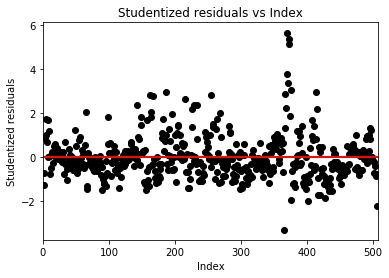

In [78]:
# Plots: 
# (i) Stundentized residuals vs Index
n = len(model3.resid)
index = np.linspace(1,n,n)
plt.figure()
plt.scatter(x = index, y = st_resid, color = "black")
plt.xlabel("Index")
plt.ylabel("Studentized residuals")
plt.title("Studentized residuals vs Index")
plt.hlines(y = 0, xmin = 0, xmax = n + 1, color = "red", linewidth = 2)
plt.xlim(0,n+1)

(-3.0725580637814858, 44.797408406953423)

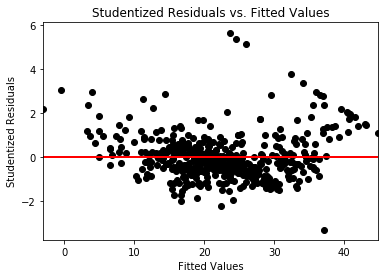

In [79]:
#(ii) Studentized Residuals vs Fitted Values. 
plt.figure()
plt.scatter(x = model3.fittedvalues, y = st_resid, color = "black")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized Residuals")
plt.title("Studentized Residuals vs. Fitted Values")
plt.hlines(y = 0, xmin = np.min(model3.fittedvalues), xmax = np.max(model3.fittedvalues), color = "red", linewidth = 2)
plt.xlim(np.min(model3.fittedvalues), np.max(model3.fittedvalues))

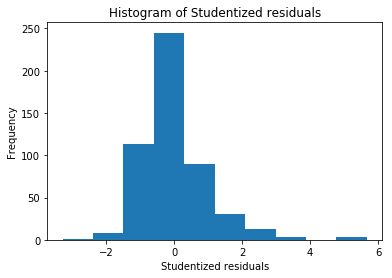

In [80]:
#(iii) Histogram in stundetized residual. 
plt.hist(st_resid)
plt.title("Histogram of Studentized residuals")
plt.xlabel("Studentized residuals")
plt.ylabel("Frequency")


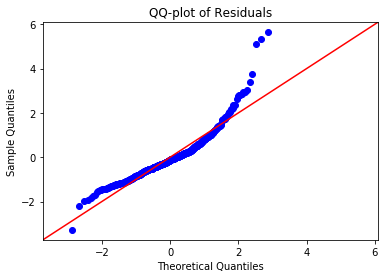

In [81]:
#(iv) QQ-Plot of the studentized residuals 
sm.qqplot(st_resid, dist = "norm", fit = True, line = '45')
plt.title("QQ-plot of Residuals")

In [82]:
# From the plots above we can say that residuals appear to 
# be normally distributed in case of index, however in case of 
# fitted values residuals are somewhat dependent thus do not 
# have a constant variance. To generalize even more we can see 
# from the histogram that residuals are slightly right-skewed 
# and from QQ-Plot we can verify that residuals are heavy 
# tailed (right skewed). 

In [83]:
# (I) Suppose that any one of the residuals assumptions is not
# satisfied. Indicate, from the list below, which inferences 
# would no longer be valid. 
# Parameter estimates 
# Hypothesis tests 
# Confidence interval
# Prediction Interval for Y_0

In [84]:
# The prediction interval for Y_0, Confidence Interval, Hypothesis 
# test will no longer be valid becuase the non-random pattern in 
# the residuals indicates that the deterministic portion 
# (predictor variables) of the model is not capturing some 
# explanatory information that is “leaking” into the residuals. 
# The graph could represent several ways in which the model is not 
# explaining all that is possible.